In [1]:
%pip install yfinance

Unable to create process using 'C:\Users\Song Yifan\Anaconda3\python.exe "C:\Users\Song Yifan\Anaconda3\Scripts\pip-script.py" install yfinance'


## 1. Prepare dataset

In [1]:
import pandas as pd # type: ignore
import numpy as np
import yfinance as yf
import seaborn as sb 
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
import warnings
warnings.filterwarnings("ignore")

In [2]:
# get the raw data and take a first look 
sp500 = yf.Ticker("^GSPC").history(period="5y")
sp500.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-08-26 00:00:00-04:00,5639.660156,5651.620117,5602.339844,5616.839844,2938570000,0.0,0.0
2024-08-27 00:00:00-04:00,5602.890137,5631.180176,5593.479980,5625.799805,2798990000,0.0,0.0
2024-08-28 00:00:00-04:00,5624.509766,5627.029785,5560.950195,5592.180176,3053450000,0.0,0.0
2024-08-29 00:00:00-04:00,5607.299805,5646.950195,5583.709961,5591.959961,3065640000,0.0,0.0
2024-08-30 00:00:00-04:00,5612.740234,5651.370117,5581.790039,5648.399902,4185850000,0.0,0.0


In [3]:
# we don't need dvidends and stock split hence drop it
sp500 = sp500.drop(columns=['Dividends', 'Stock Splits'])
sp500.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2024-08-26 00:00:00-04:00,5639.660156,5651.620117,5602.339844,5616.839844,2938570000
2024-08-27 00:00:00-04:00,5602.890137,5631.180176,5593.479980,5625.799805,2798990000
2024-08-28 00:00:00-04:00,5624.509766,5627.029785,5560.950195,5592.180176,3053450000
2024-08-29 00:00:00-04:00,5607.299805,5646.950195,5583.709961,5591.959961,3065640000
2024-08-30 00:00:00-04:00,5612.740234,5651.370117,5581.790039,5648.399902,4185850000


In [4]:
# Summary statistics
sp500.describe()

,Open,High,Low,Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,4073.068429,4097.254670,4047.653718,4073.965853,4.351033e+09
std,694.587484,694.136143,695.670004,694.879867,1.051742e+09
min,2290.709961,2300.729980,2191.860107,2237.399902,1.296530e+09
25%,3610.755066,3642.810059,3588.245056,3614.699890,3.724968e+09
50%,4128.294922,4150.919922,4103.879883,4130.040039,4.083145e+09
75%,4492.720093,4517.257446,4468.715210,4495.095093,4.705292e+09
max,5644.089844,5669.669922,5639.020020,5667.200195,9.976520e+09


In [5]:
# General info
sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2019-09-03 00:00:00-04:00 to 2024-08-30 00:00:00-04:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   float64
 4   Volume  1258 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


In [6]:
# We can use pandas to calculate the moving average for different time periods
sp500['50ma'] = sp500['Close'].rolling(window=50).mean()
sp500['200ma'] = sp500['Close'].rolling(window=200).mean()
sp500['vwap'] = sp500['Close'] * sp500['Volume']

In [7]:
sp500.tail(10)

,Open,High,Low,Close,Volume,50ma,200ma,vwap
Date,,,,,,,,
2024-08-19 00:00:00-04:00,5557.229980,5608.299805,5550.740234,5608.250000,3222050000,5469.287227,5071.516257,1.807006e+13
2024-08-20 00:00:00-04:00,5602.879883,5620.509766,5585.500000,5597.120117,2994420000,5474.289824,5078.312559,1.676013e+13
2024-08-21 00:00:00-04:00,5603.089844,5632.680176,5591.569824,5620.850098,3119670000,5479.491025,5084.827910,1.753520e+13
2024-08-22 00:00:00-04:00,5637.770020,5643.220215,5560.950195,5570.640137,2981530000,5483.397432,5090.889412,1.660903e+13
2024-08-23 00:00:00-04:00,5602.490234,5641.819824,5585.160156,5634.609863,3291940000,5487.669033,5097.232561,1.854880e+13
2024-08-26 00:00:00-04:00,5639.660156,5651.620117,5602.339844,5616.839844,2938570000,5491.331025,5103.424861,1.650548e+13
2024-08-27 00:00:00-04:00,5602.890137,5631.180176,5593.479980,5625.799805,2798990000,5495.215020,5109.639961,1.574656e+13
2024-08-28 00:00:00-04:00,5624.509766,5627.029785,5560.950195,5592.180176,3053450000,5497.594023,5115.864111,1.707544e+13
2024-08-29 00:00:00-04:00,5607.299805,5646.950195,5583.709961,5591.959961,3065640000,5499.692627,5121.747710,1.714294e+13


### Exploratory Data Analysis

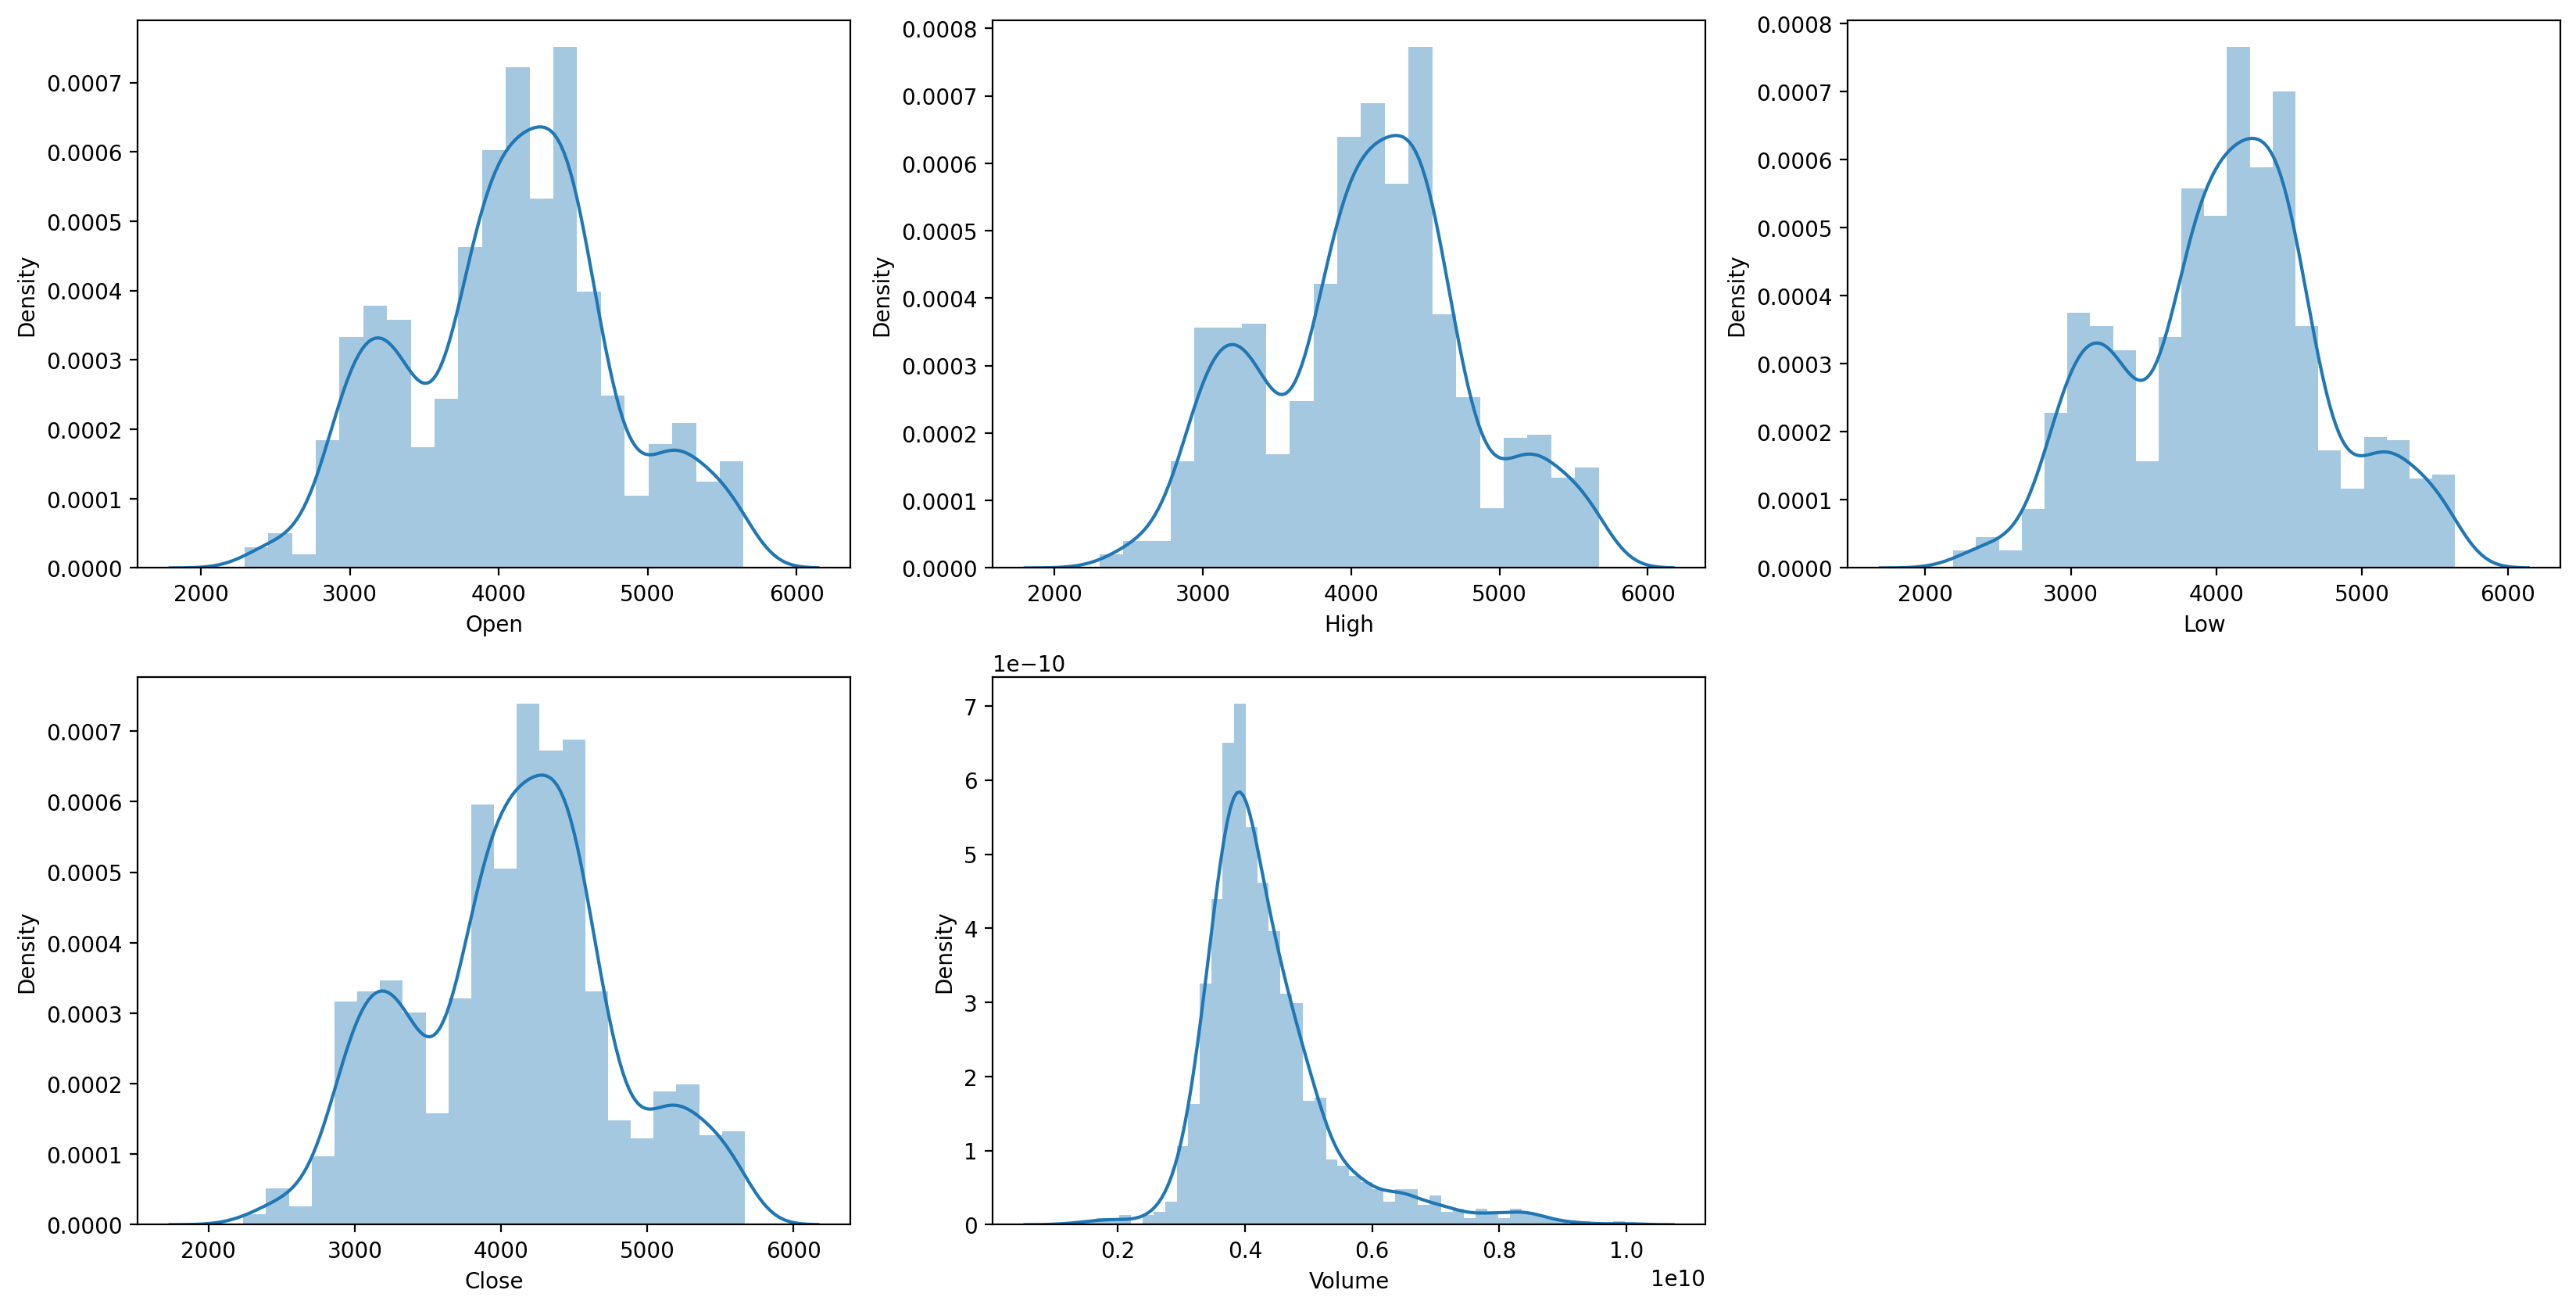

In [8]:
features = ['Open', 'High', 'Low', 'Close', 'Volume'] 
  
plt.subplots(figsize=(20,10)) 
  
for i, col in enumerate(features): 
  plt.subplot(2,3,i+1) 
  sb.distplot(sp500[col]) 
plt.show()

In [9]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Ohlc(x=sp500.index,
                    open=sp500['Open'],
                    high=sp500['High'],
                    low=sp500['Low'],
                    close=sp500['Close']))
fig.show()

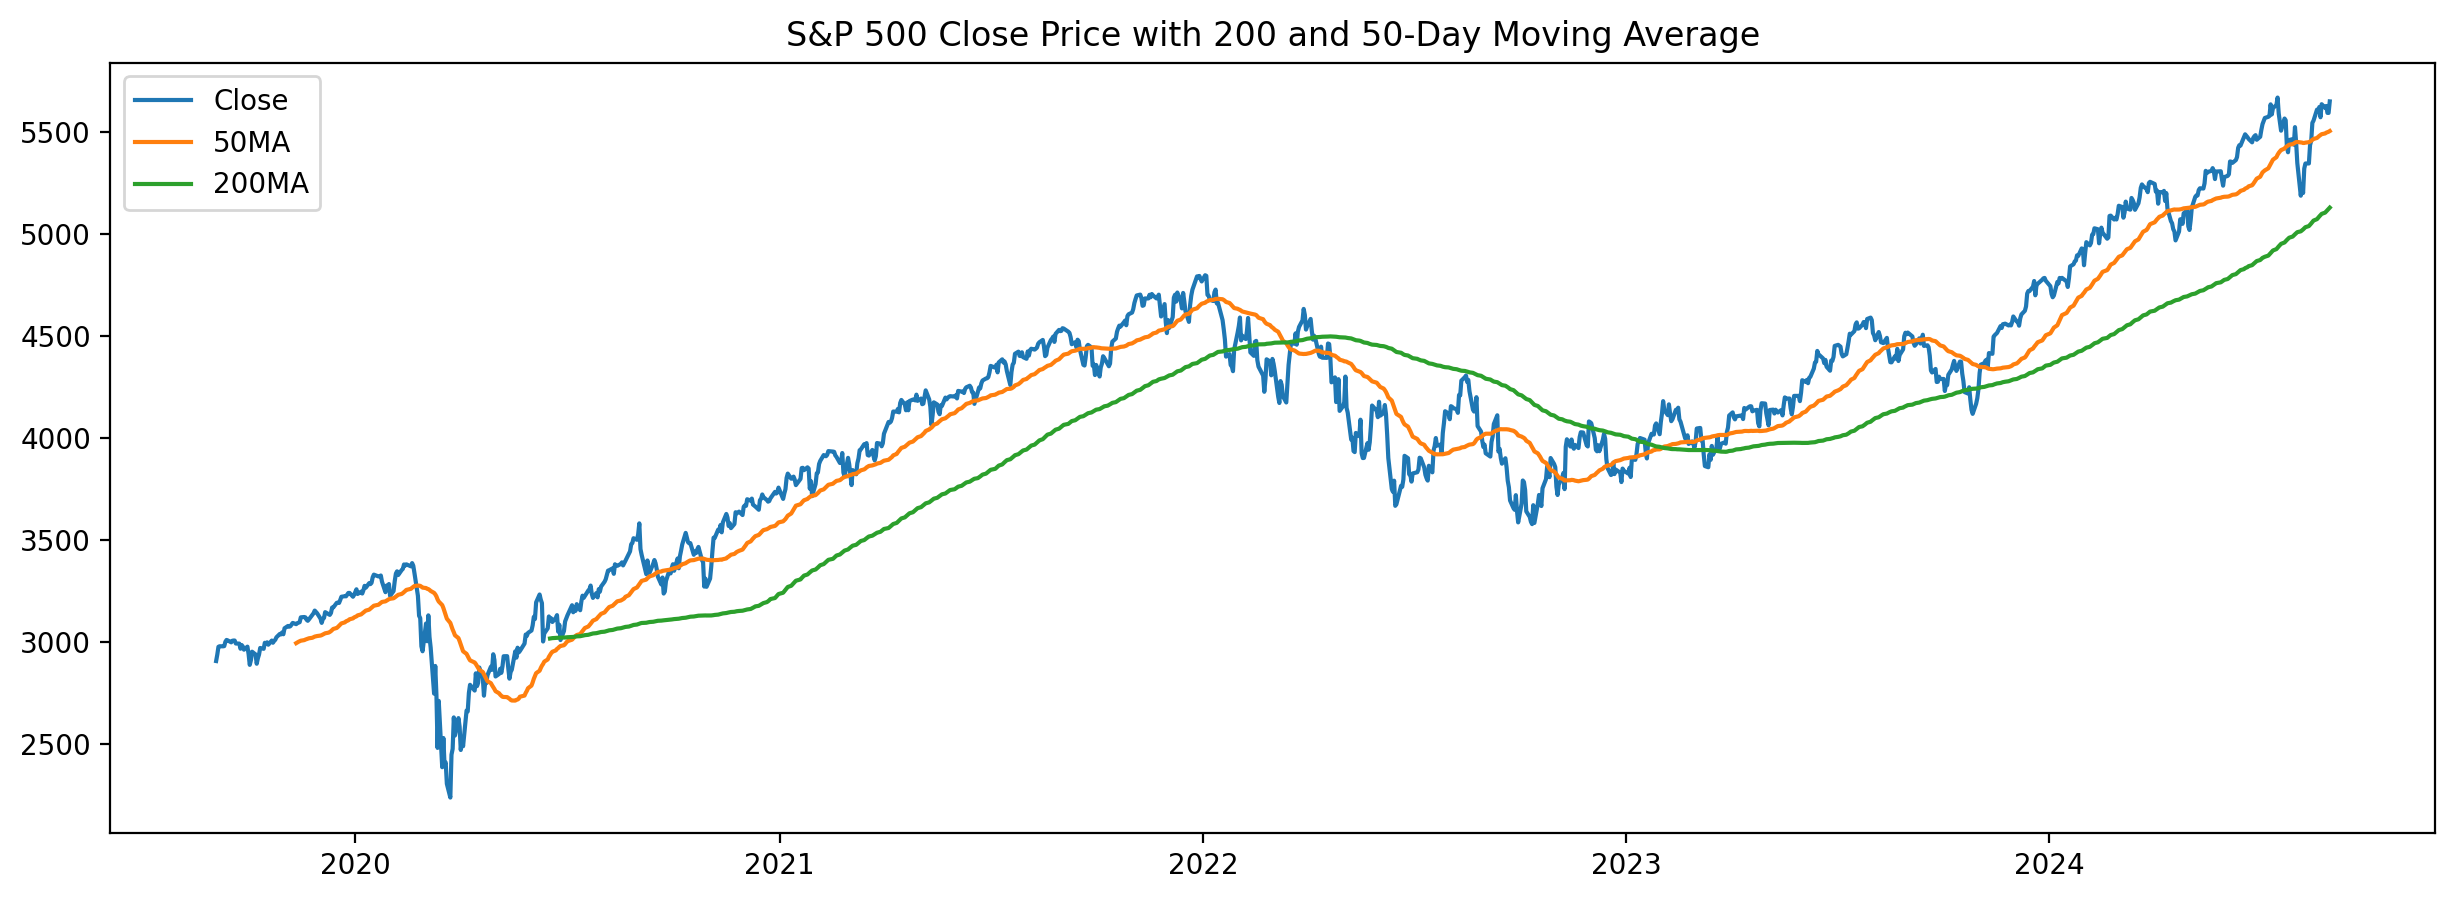

In [10]:
# Let's plot the data to see the moving averages
## we observe that when 50 ma cross up above the 200 ma, the stock price goes up, and when
## 50ma cross down below 200ma. the stock price goes down
plt.figure(figsize=(15, 5))
plt.title('S&P 500 Close Price with 200 and 50-Day Moving Average')
plt.plot(sp500['Close'])
plt.plot(sp500['50ma'])
plt.plot(sp500['200ma'])
plt.legend(['Close', '50MA', '200MA'])
plt.show()

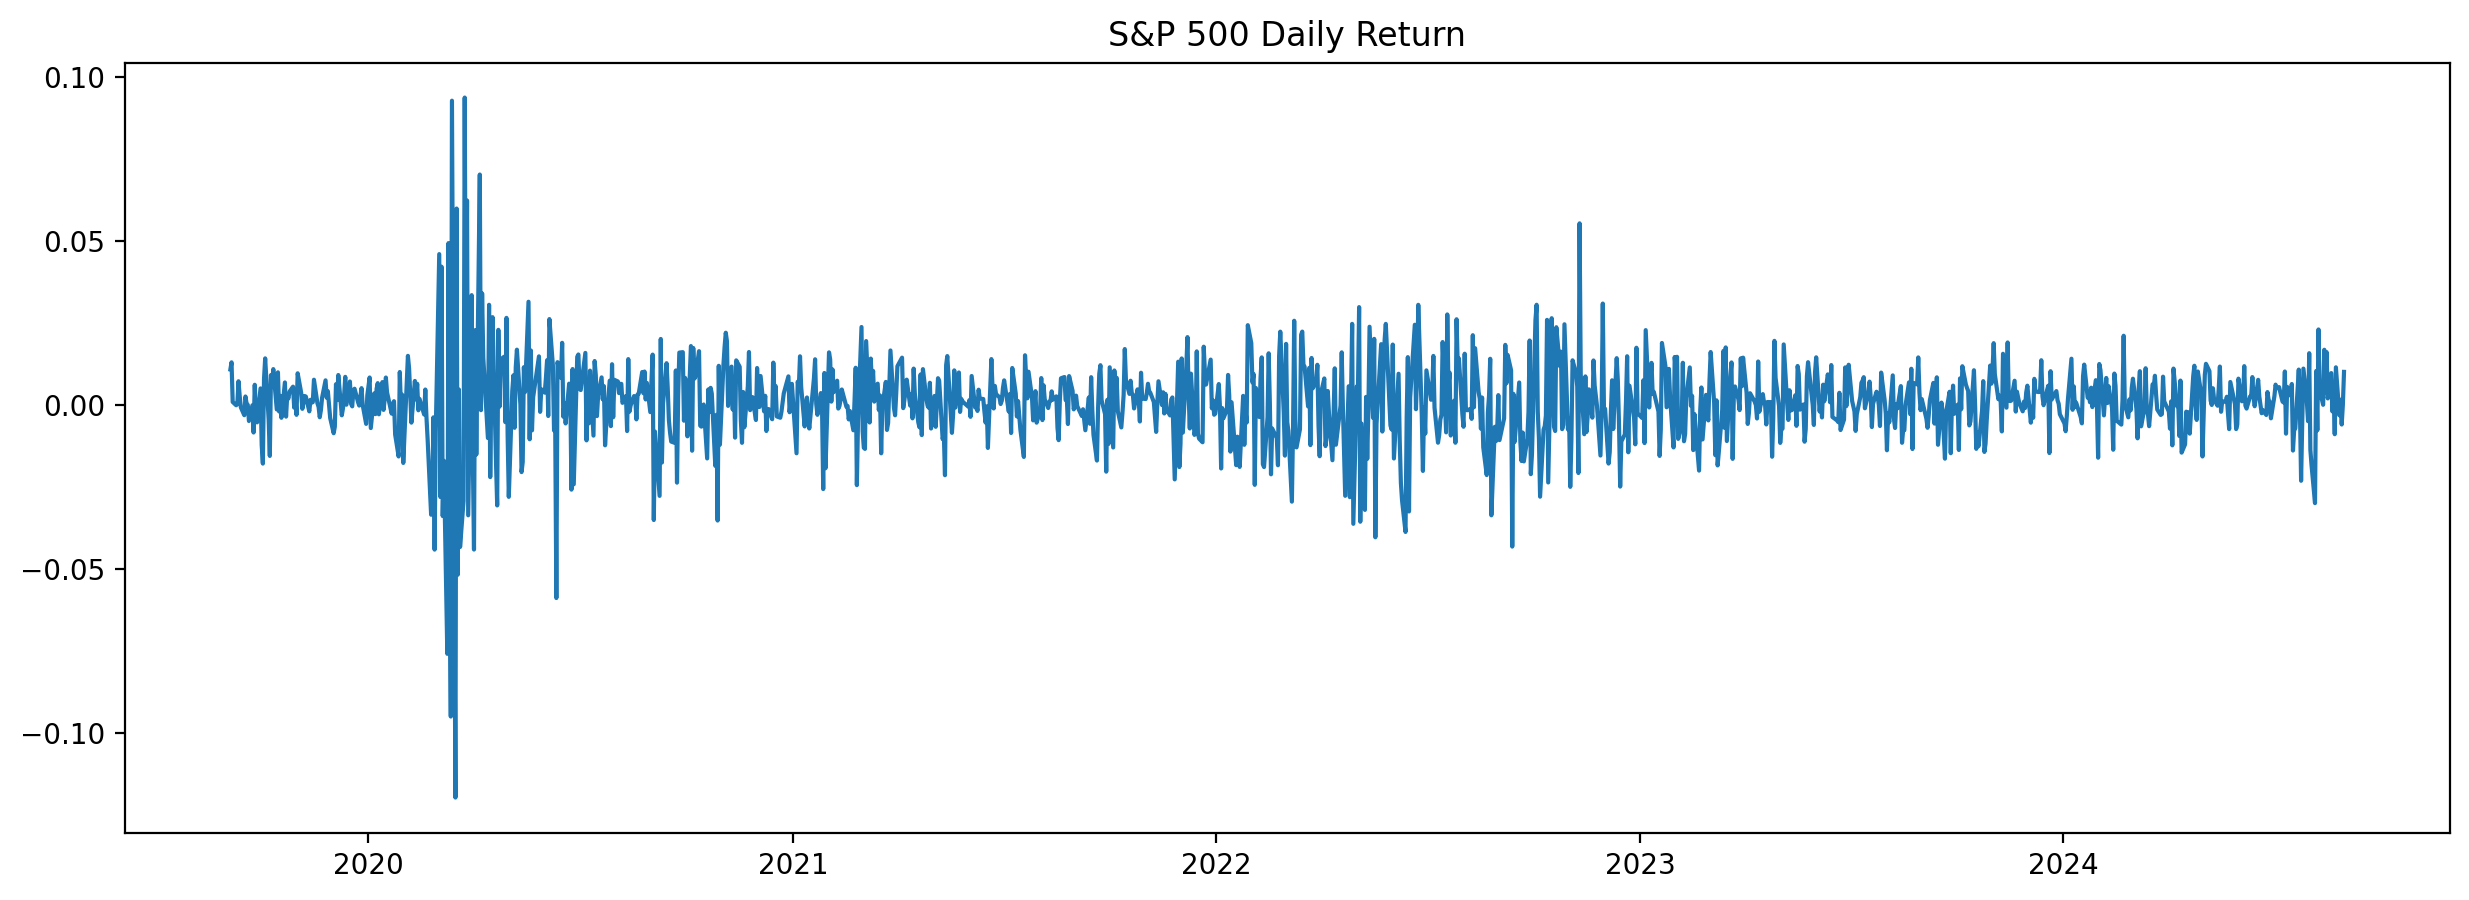

In [11]:
# Calculate the daily return of the close price
sp500['return'] = sp500['Close'].pct_change()

# Plot the daily return
plt.figure(figsize=(15, 5))
plt.title('S&P 500 Daily Return')
plt.plot(sp500['return'])
plt.show()

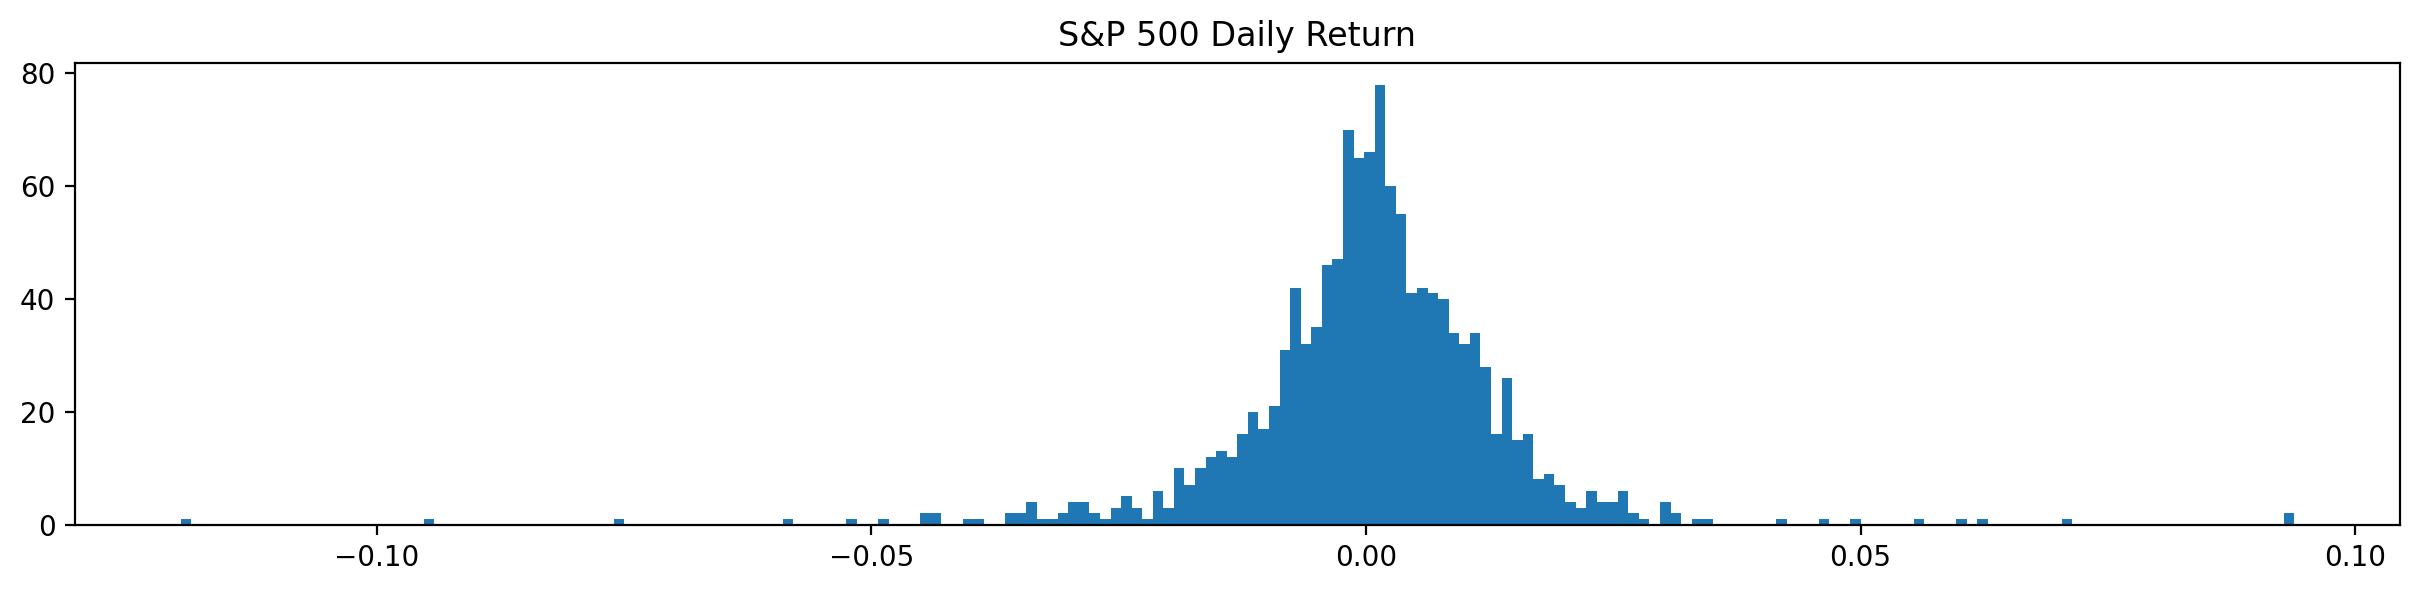

In [12]:
# Plot the daily return using an histogram
## the daily return almost symmetric at 0 and a bit right skewed
plt.figure(figsize=(15, 3))
plt.title('S&P 500 Daily Return')
sp500['return'].hist(bins=200, grid=False)
plt.show()


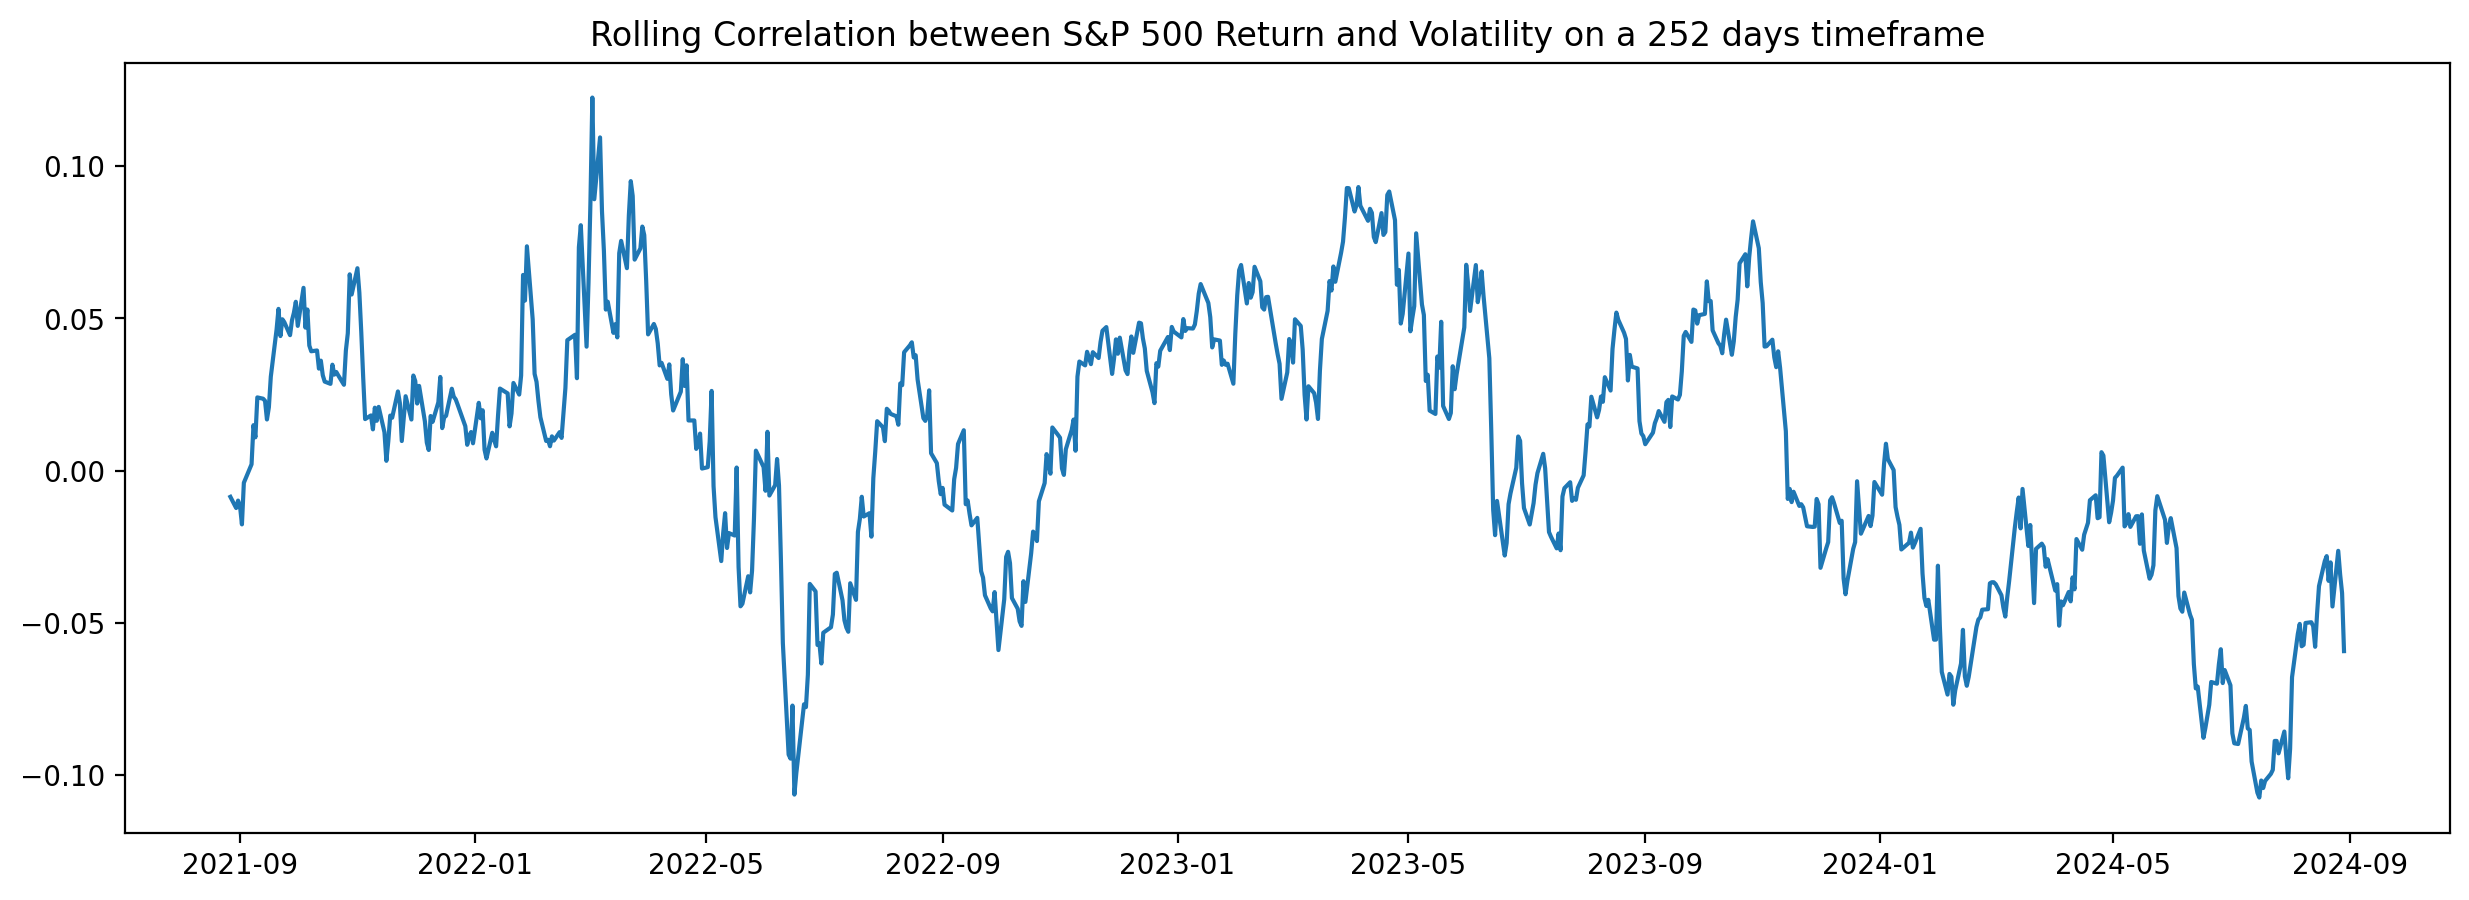

In [12]:
# Calculate the volatility of the close price
sp500['volatility'] = sp500['return'].rolling(window=252).std() * (252 ** 0.5)

# Calculate the rolling correlation between the return and volatility
sp500['corr252'] = sp500['return'].rolling(window=252).corr(sp500['volatility'])

# Plot the rolling correlation
plt.figure(figsize=(15, 5))
plt.title('Rolling Correlation between S&P 500 Return and Volatility on a 252 days timeframe')
plt.plot(sp500['corr252'])
plt.show()

## Train the models:
As the data is time series, we use some time series analysis to predict the sp500 price
- Regression Model
- ARIMA
- Neural Networks for stock price prediction
  LSTM (long short term memory): as it's sequential data, LSTM network can capture dependencies  and patterns over time, making them suitable for time-series prediction tasks


### Regression Model
we want to predict sp500 price at time t with sp500 price at time t-1 and moving average
$$P_t = \alpha_1*P_{t-1}+\alpha_2*MA50 + \alpha_3*MA200 + \alpha_4$$

In [30]:
sp500["Close_lag"] = sp500["Close"].shift(1)
data = sp500.dropna()

# Define features and target
X = data[['Close_lag','50ma','200ma']]
y = data['Close']


In [31]:
## we fail to reject the null hypothesis and the close data is actually non-stationary
# Linear regression requires stationary data, meaning the mean, variance, and autocorrelation remain constant over time. 
# Non-stationary data needs pre-processing like differencing or detrending. 
from statsmodels.tsa.stattools import adfuller
result = adfuller(y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.932960
p-value: 0.776925
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


In [37]:
y_diff = data['Close'] - data['Close_lag']
result = adfuller(y_diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))


ADF Statistic: -32.689853
p-value: 0.000000
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


In [32]:
cormat = data.corr()
round(cormat,4)

,Open,High,Low,Close,Volume,50ma,200ma,vwap,return,Close_lag
Open,1.0000,0.9993,0.9989,0.9979,-0.2735,0.9652,0.8339,0.3336,-0.0215,0.9994
High,0.9993,1.0000,0.9988,0.9989,-0.2681,0.9681,0.8402,0.3397,0.0040,0.9984
Low,0.9989,0.9988,1.0000,0.9991,-0.2872,0.9609,0.8262,0.3211,0.0122,0.9980
Close,0.9979,0.9989,0.9991,1.0000,-0.2799,0.9636,0.8326,0.3289,0.0365,0.9969
Volume,-0.2735,-0.2681,-0.2872,-0.2799,1.0000,-0.2151,-0.1765,0.8062,-0.0961,-0.2721
50ma,0.9652,0.9681,0.9609,0.9636,-0.2151,1.0000,0.9072,0.3713,-0.0259,0.9656
200ma,0.8339,0.8402,0.8262,0.8326,-0.1765,0.9072,1.0000,0.3346,-0.0362,0.8353
vwap,0.3336,0.3397,0.3211,0.3289,0.8062,0.3713,0.3346,1.0000,-0.0704,0.3349
return,-0.0215,0.0040,0.0122,0.0365,-0.0961,-0.0259,-0.0362,-0.0704,1.0000,-0.0413
Close_lag,0.9994,0.9984,0.9980,0.9969,-0.2721,0.9656,0.8353,0.3349,-0.0413,1.0000


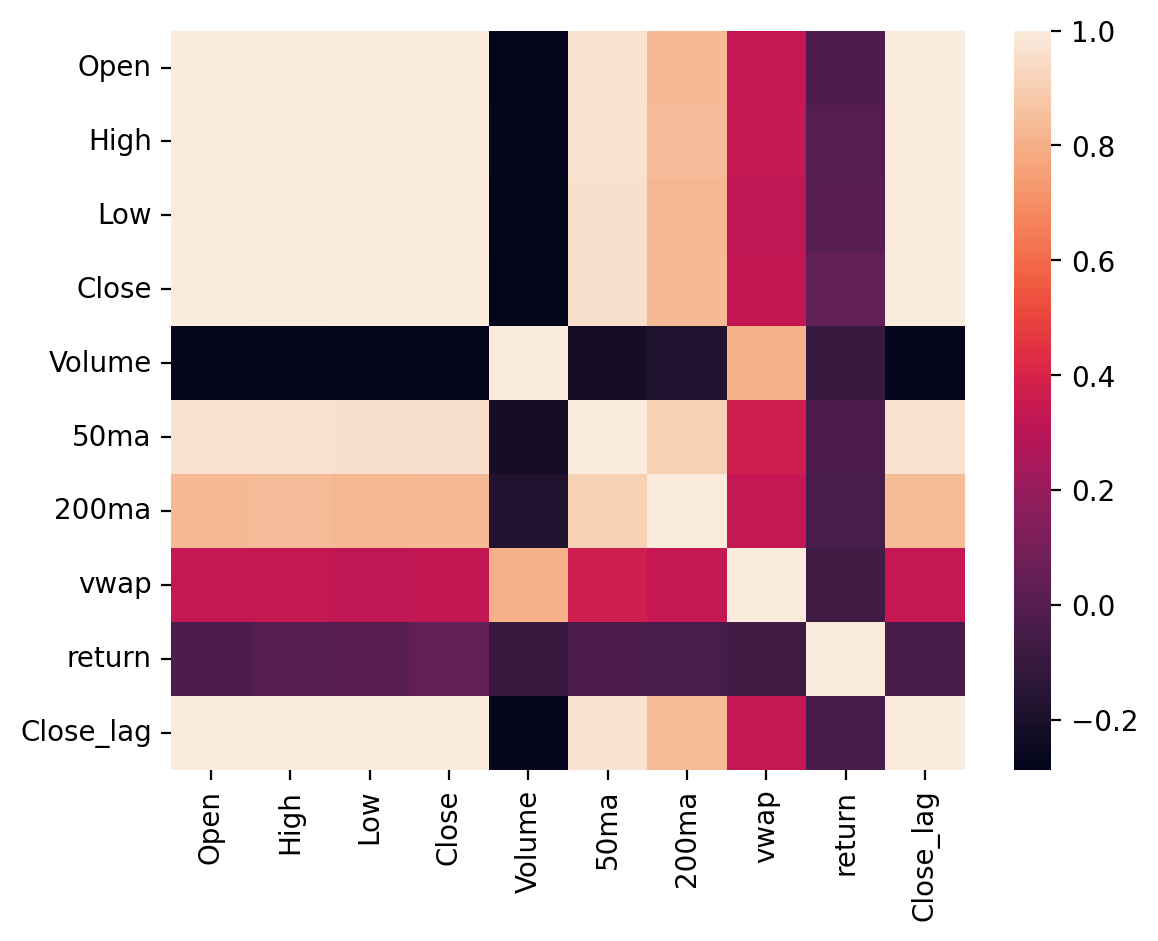

In [33]:
sb.heatmap(cormat);

In [34]:
# Split data into training and testing sets, as it's a time series model, we can only select based on time
train_size = int(len(X) * 0.8)
X_train = X.iloc[0:train_size,:]
y_train = y[0:train_size]
X_test = X.iloc[train_size:,:]
y_test = y[train_size:]



In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)
# Make predictions
predictions = model.predict(X_test)
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f'Mean Squared root Error: {mse**0.5}')
print(f'R² Score: {r2}')

Mean Squared root Error: 42.209899275249
R² Score: 0.9864573789690313


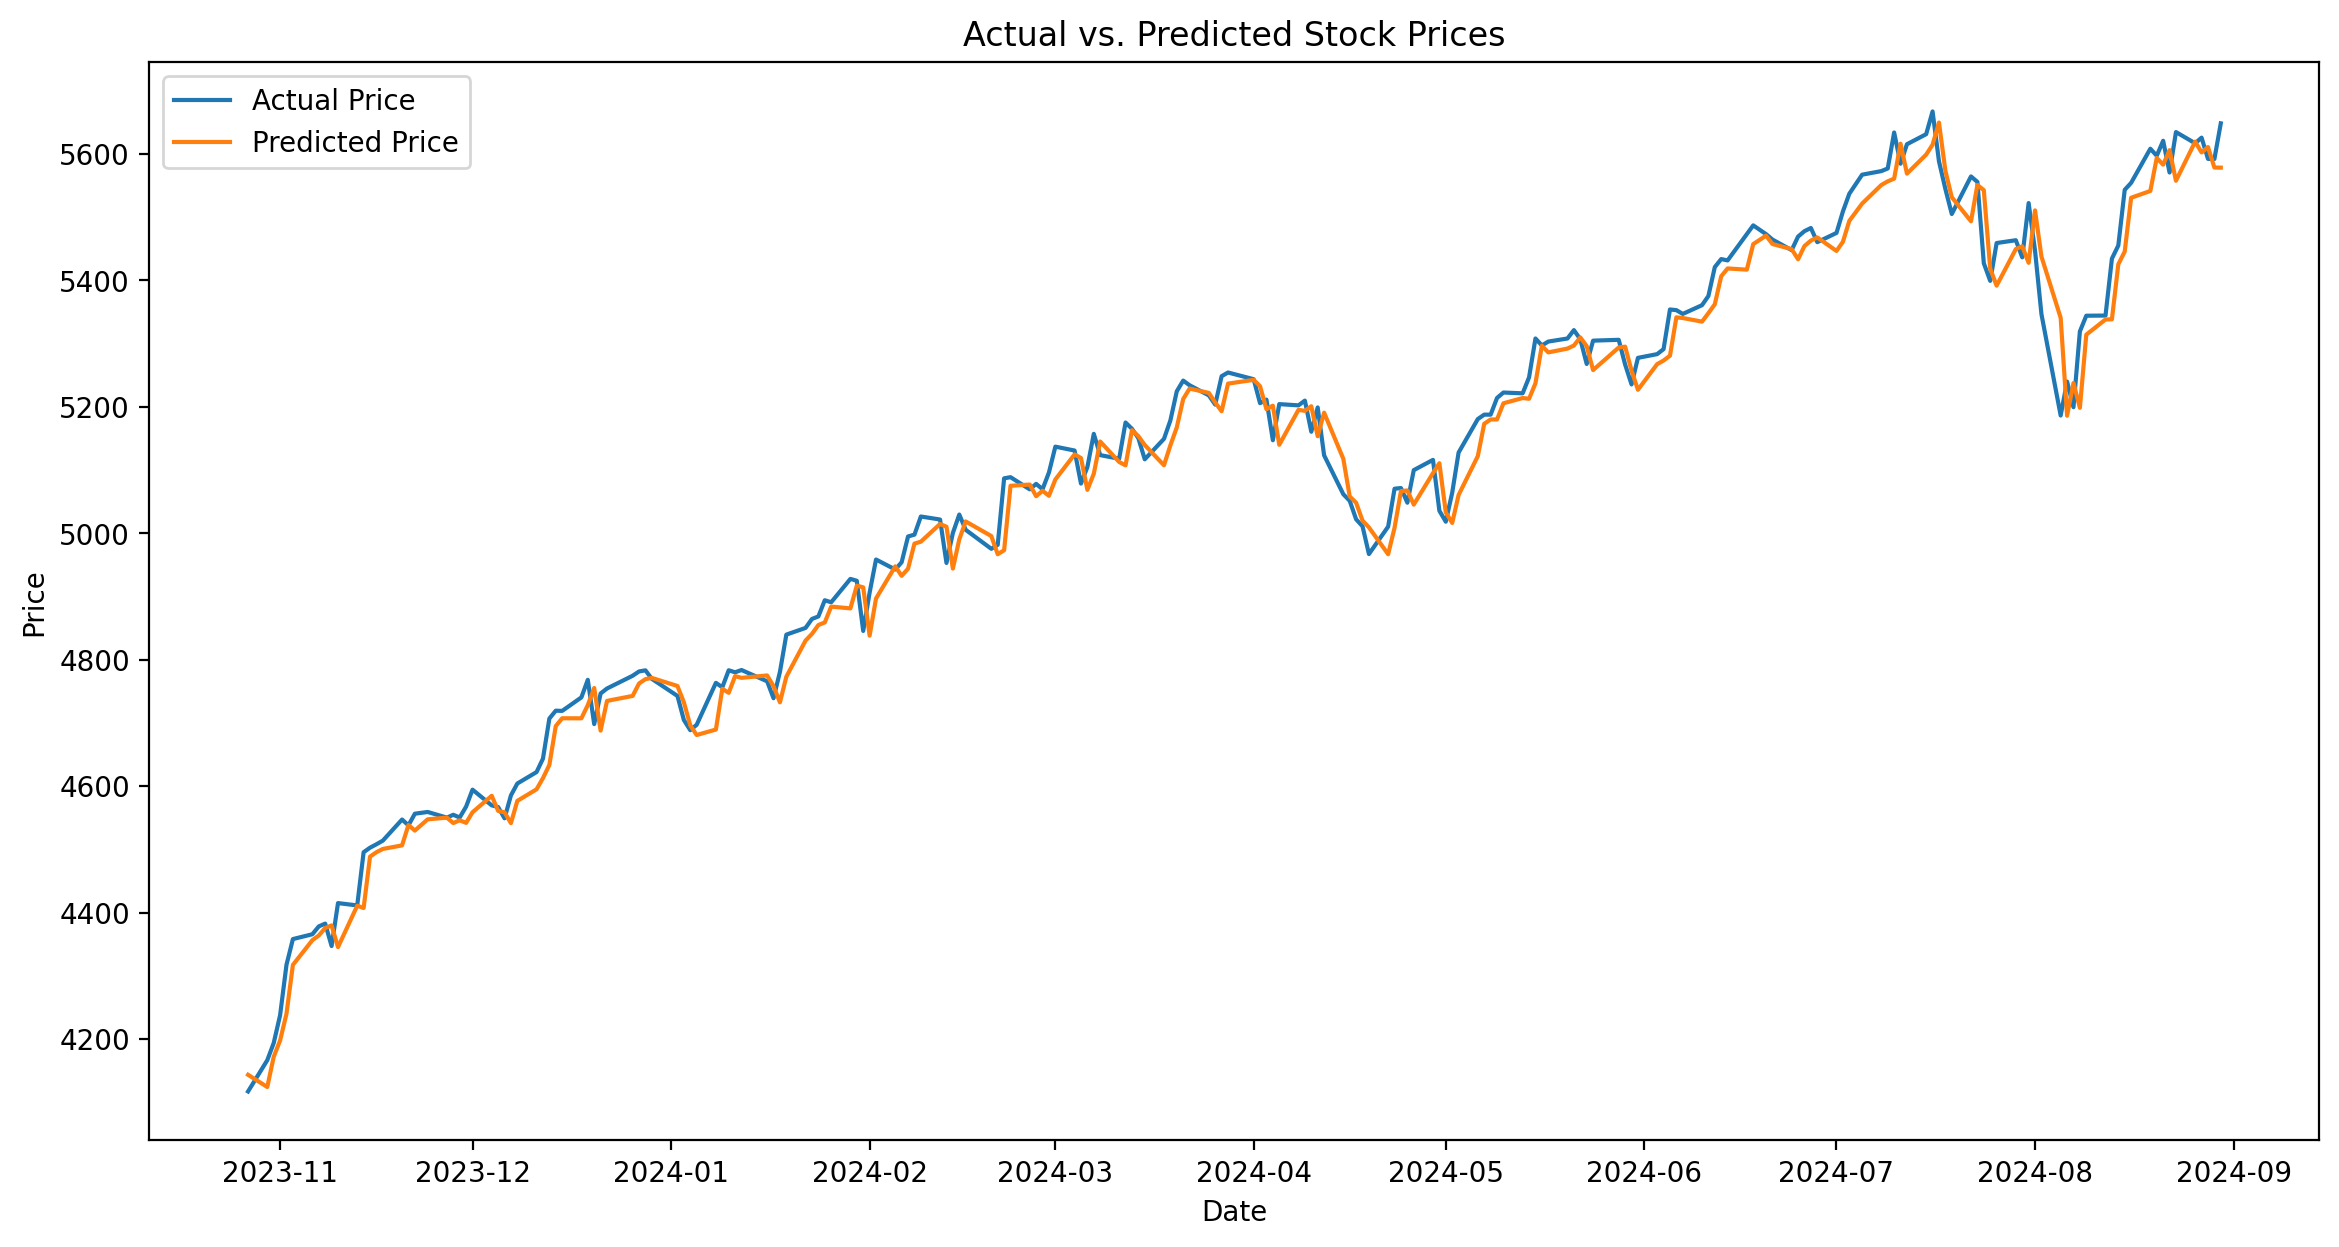

In [36]:
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test.values, label='Actual Price')
plt.plot(y_test.index, predictions, label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Stock Prices')
plt.legend()
plt.show()



### ARIMA
Autoregressive integrated moving average (ARIMA) models predict future values based on past values.
ARIMA makes use of lagged moving averages to smooth time series data.

p: the number of lag observations in the model, also known as the lag order.

d: the number of times the raw observations are differenced; also known as the degree of differencing.

q: the size of the moving average window, also known as the order of the moving average.

In [63]:
## we have checked the first diff between close and close lag price, and the 1-st order diff is stationary
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

data = sp500[["Close"]].dropna()
train_size = int(len(data) * 0.8)
train_data = data.iloc[0:train_size,:]
test_data = data.iloc[train_size:,:]

model = pm.auto_arima(train_data, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
print(model.summary())

model.fit(train_data)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.95 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=11257.221, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=10987.145, Time=0.21 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.37 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=11247.329, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=10835.157, Time=0.49 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.97 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.81 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=10846.754, Time=0.45 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=10832.058, Time=0.69 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=10977.277, Time=0.32 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=2.51 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=0.90 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=10833.495, Time=0.77 sec
 ARIMA(2,1,1)(2,1,0)[12]             : AI

ARIMA(order=(2, 1, 0), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [66]:
# make predictions
predictions = model.predict(n_periods=len(test_data))

mse = mean_squared_error(test_data, predictions)
print(f'Mean Squared root Error: {mse**0.5}')


Mean Squared root Error: 449.4044015179439


c:\Users\Song Yifan\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



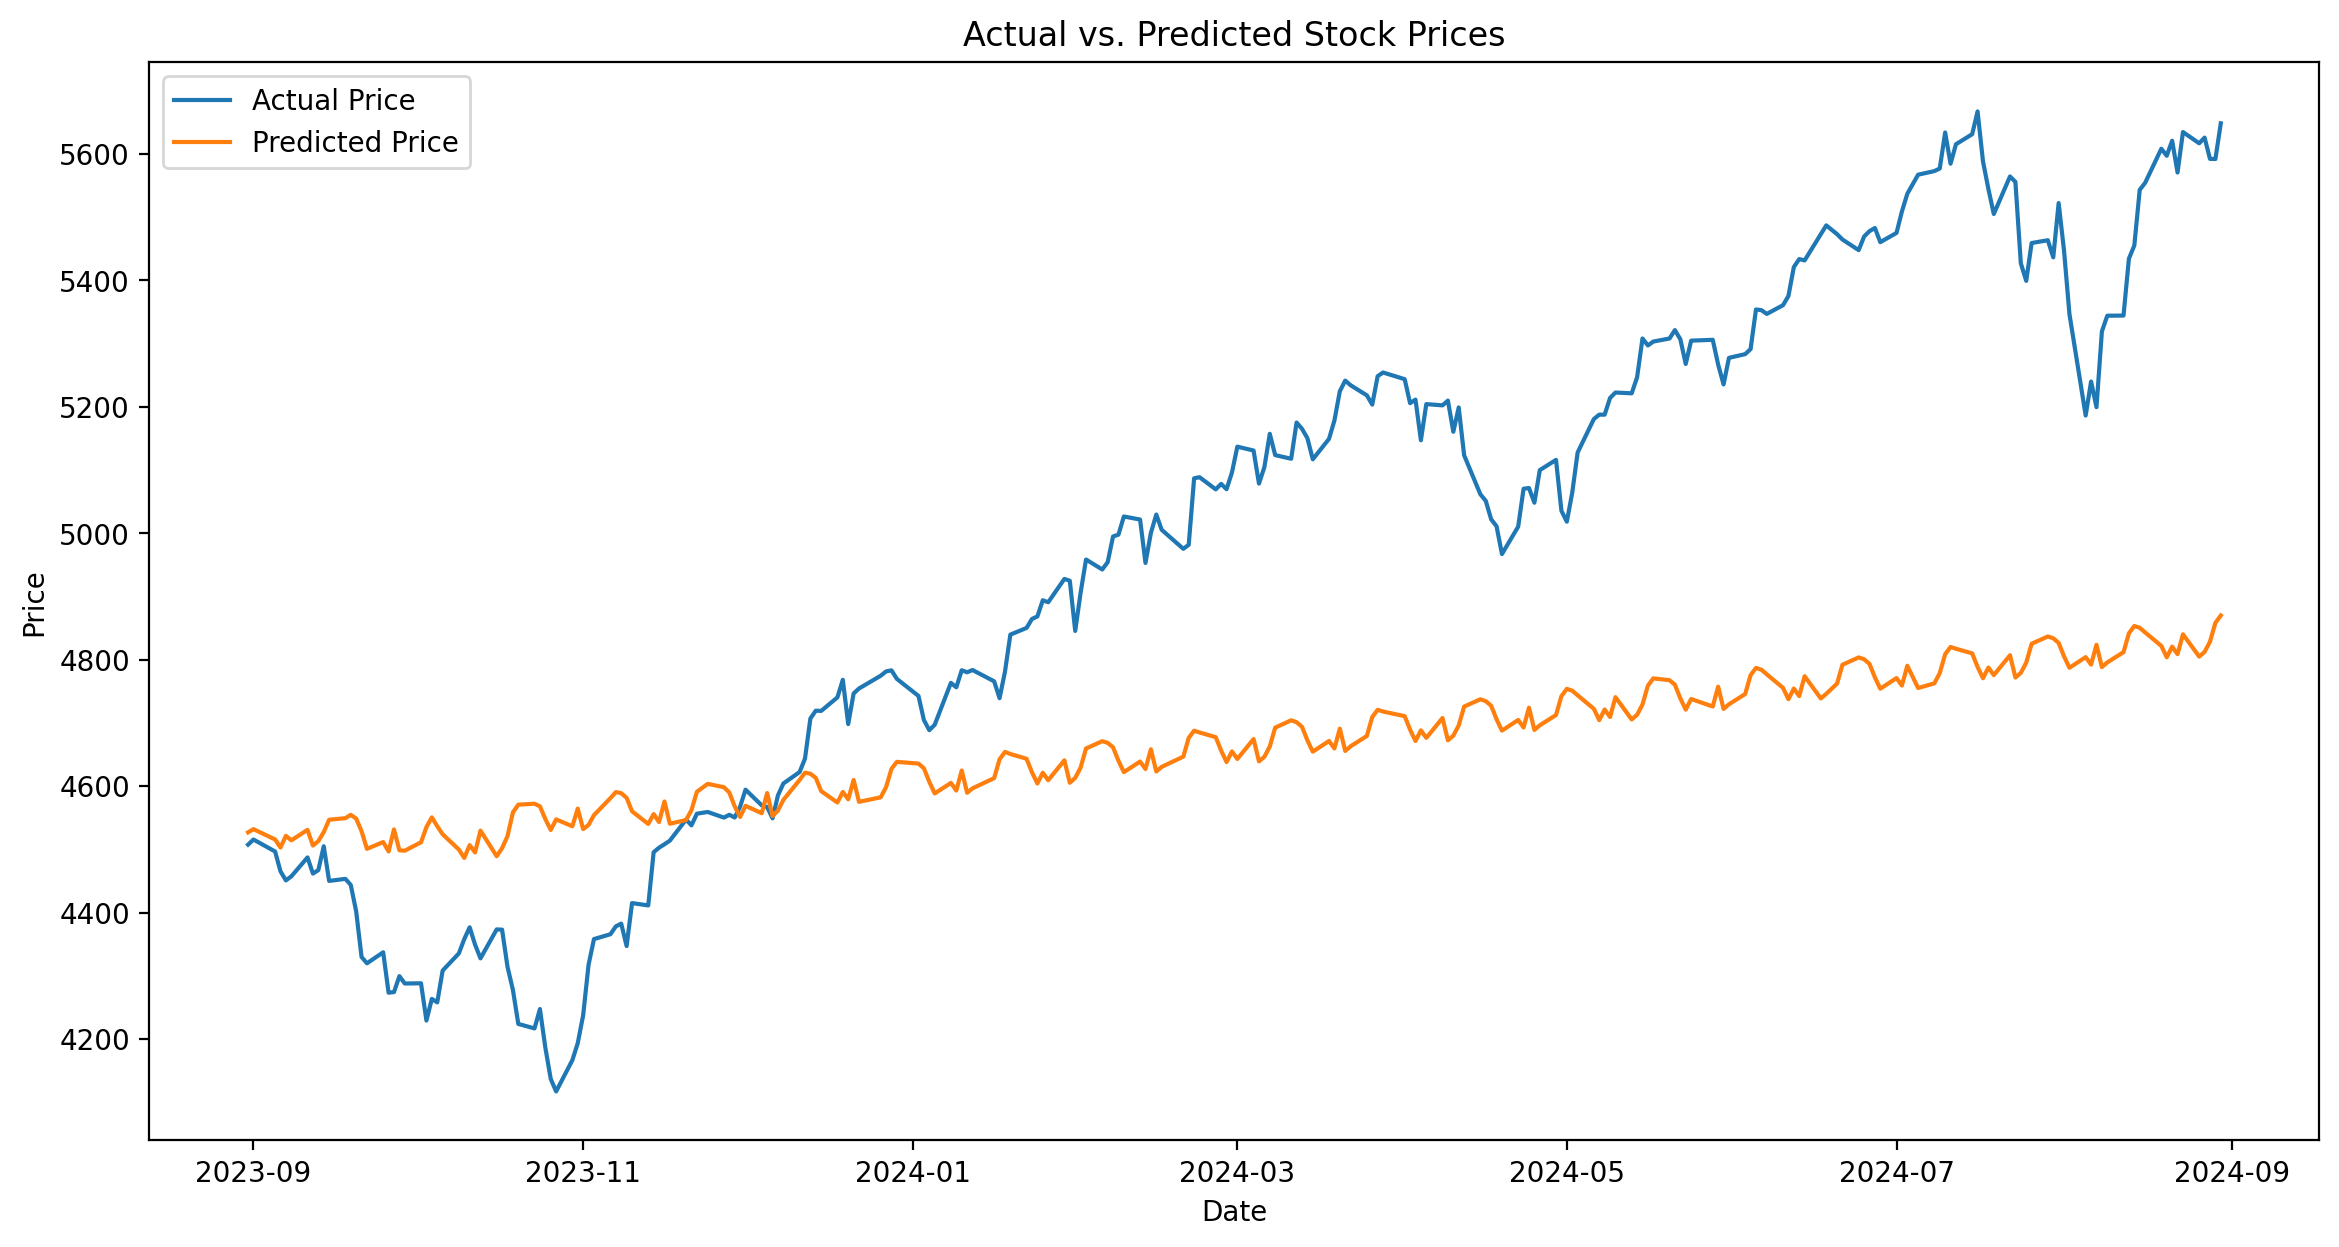

In [67]:
plt.figure(figsize=(14, 7))
plt.plot(test_data.index, test_data.values, label='Actual Price')
plt.plot(test_data.index, predictions, label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Stock Prices')
plt.legend()
plt.show()


ARIMA only captures the uptrend of the prices, and fails to capture other features. hence it performs badly

### KNN

In [88]:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

In [105]:
# get the data
data = sp500.dropna()

# Define features and target
X = data[['Close_lag','50ma','200ma']]
y = data[['Close']]

In [108]:
# Split data into training and testing sets, as it's a time series model, we can only select based on time
train_size = int(len(X) * 0.8)
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y)

X_train = X_scaled[0:train_size,:]
y_train = y_scaled[0:train_size]
X_test = X_scaled[train_size:,:]
y_test = y[train_size:]



In [109]:
#using gridsearch to find the best parameter
params = {'n_neighbors':[9,10,11,12,13,14,15,16,17,18,19,20]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

#fit the model and make predictions
model.fit(X_train,y_train)
predictions = model.predict(X_test)
predictions = predictions.reshape(-1,1)

In [110]:
predictions = scaler.inverse_transform(predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f'Mean Squared root Error: {mse**0.5}')
print(f'R² Score: {r2}')

Mean Squared root Error: 491.5421918291975
R² Score: -0.8365201485851015


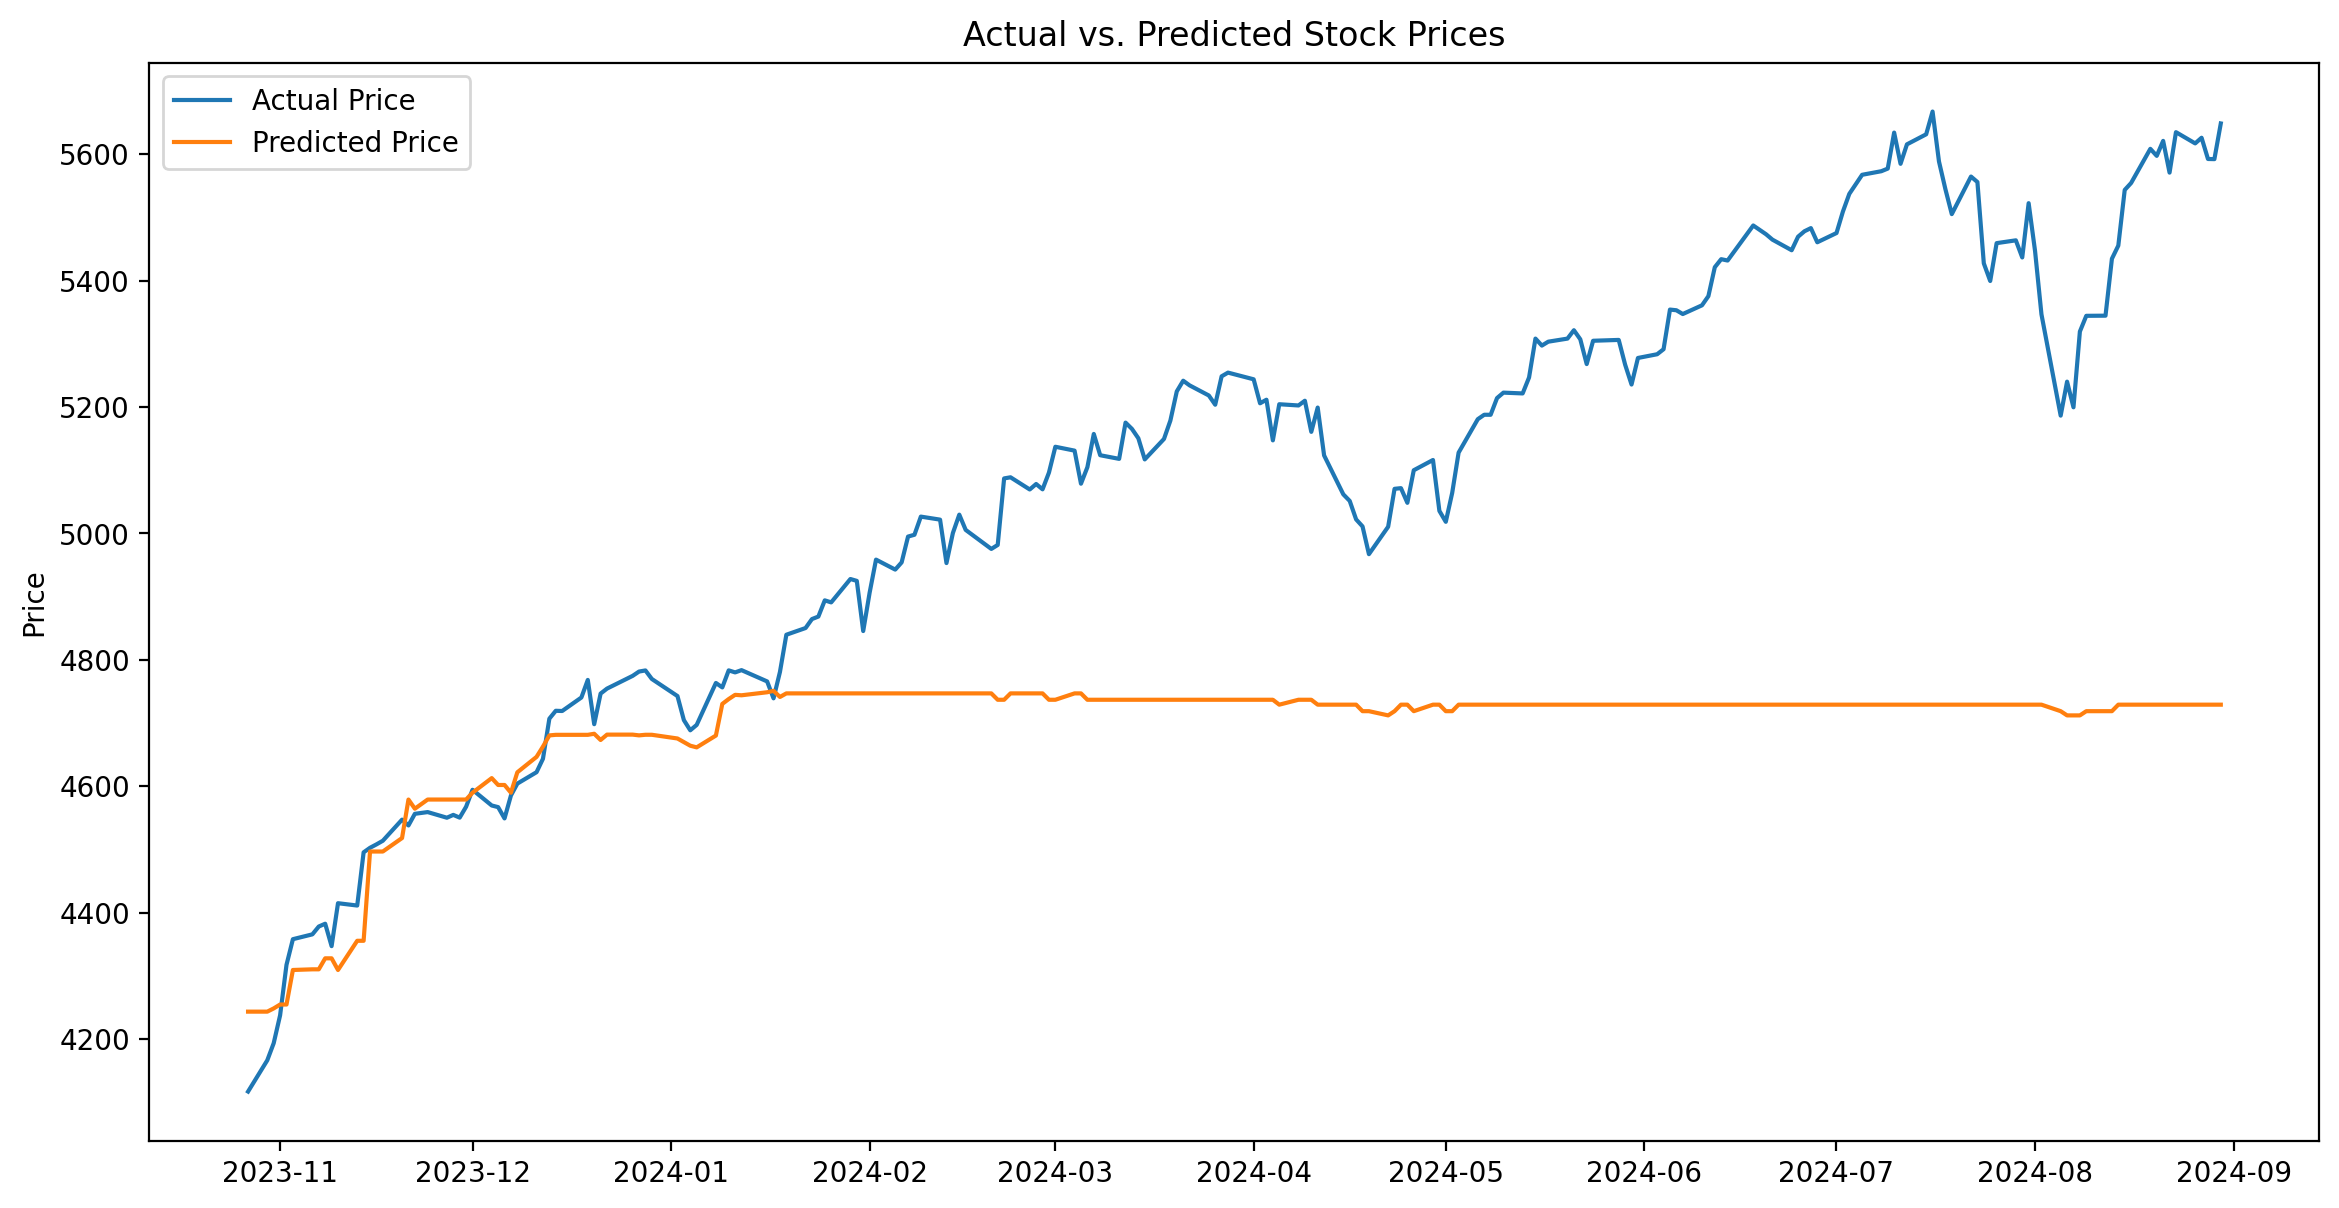

In [111]:
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Price')
plt.plot(y_test.index, predictions, label='Predicted Price')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Stock Prices')
plt.legend()
plt.show()

### LSTM

In [112]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [113]:
def create_dataset(data, period):
    x, y = [], []
    for i in range(len(data) - period - 1):
        x.append(data[i:(i + period), 0])
        y.append(data[i + period, 0])
    return np.array(x), np.array(y)

In [114]:
# train the models
# define hyperparameters
period = 50
epochs = 100
batch_size = 32

# create train and test datasets
data = sp500.filter(['Close']).values
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)
train_size = int(len(data) * 0.8)
train_data = data[0:train_size, :]
test_data = data[train_size - period:, :]
x_train, y_train = create_dataset(train_data, period)
x_test, y_test = create_dataset(test_data, period)


In [115]:
# Reshape input to be [samples, time steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [116]:
# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size)

# Make predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)



Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0507
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0026
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0013
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9.7836e-04
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.7095e-04
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.3889e-04
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.2422e-04
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.9971e-04
Epoch 9/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.7652e-04
Epoch 10/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 8.2695e-04
Epoch 11/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7.9635e-04
Epoch 12/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 7.8386e-04
Epoch 13/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 7.6657e-04
Epoch 14/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7.8399e-04
Epoch 15/100


In [117]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95,705 (373.85 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 63,804 (249.24 KB)

In [118]:
y_test = y_test.reshape(-1,1)
y_test = scaler.inverse_transform(y_test)

In [119]:
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f'Mean Squared root Error: {mse**0.5}')
print(f'R² Score: {r2}')

Mean Squared root Error: 59.29260380730208
R² Score: 0.9806700450055087


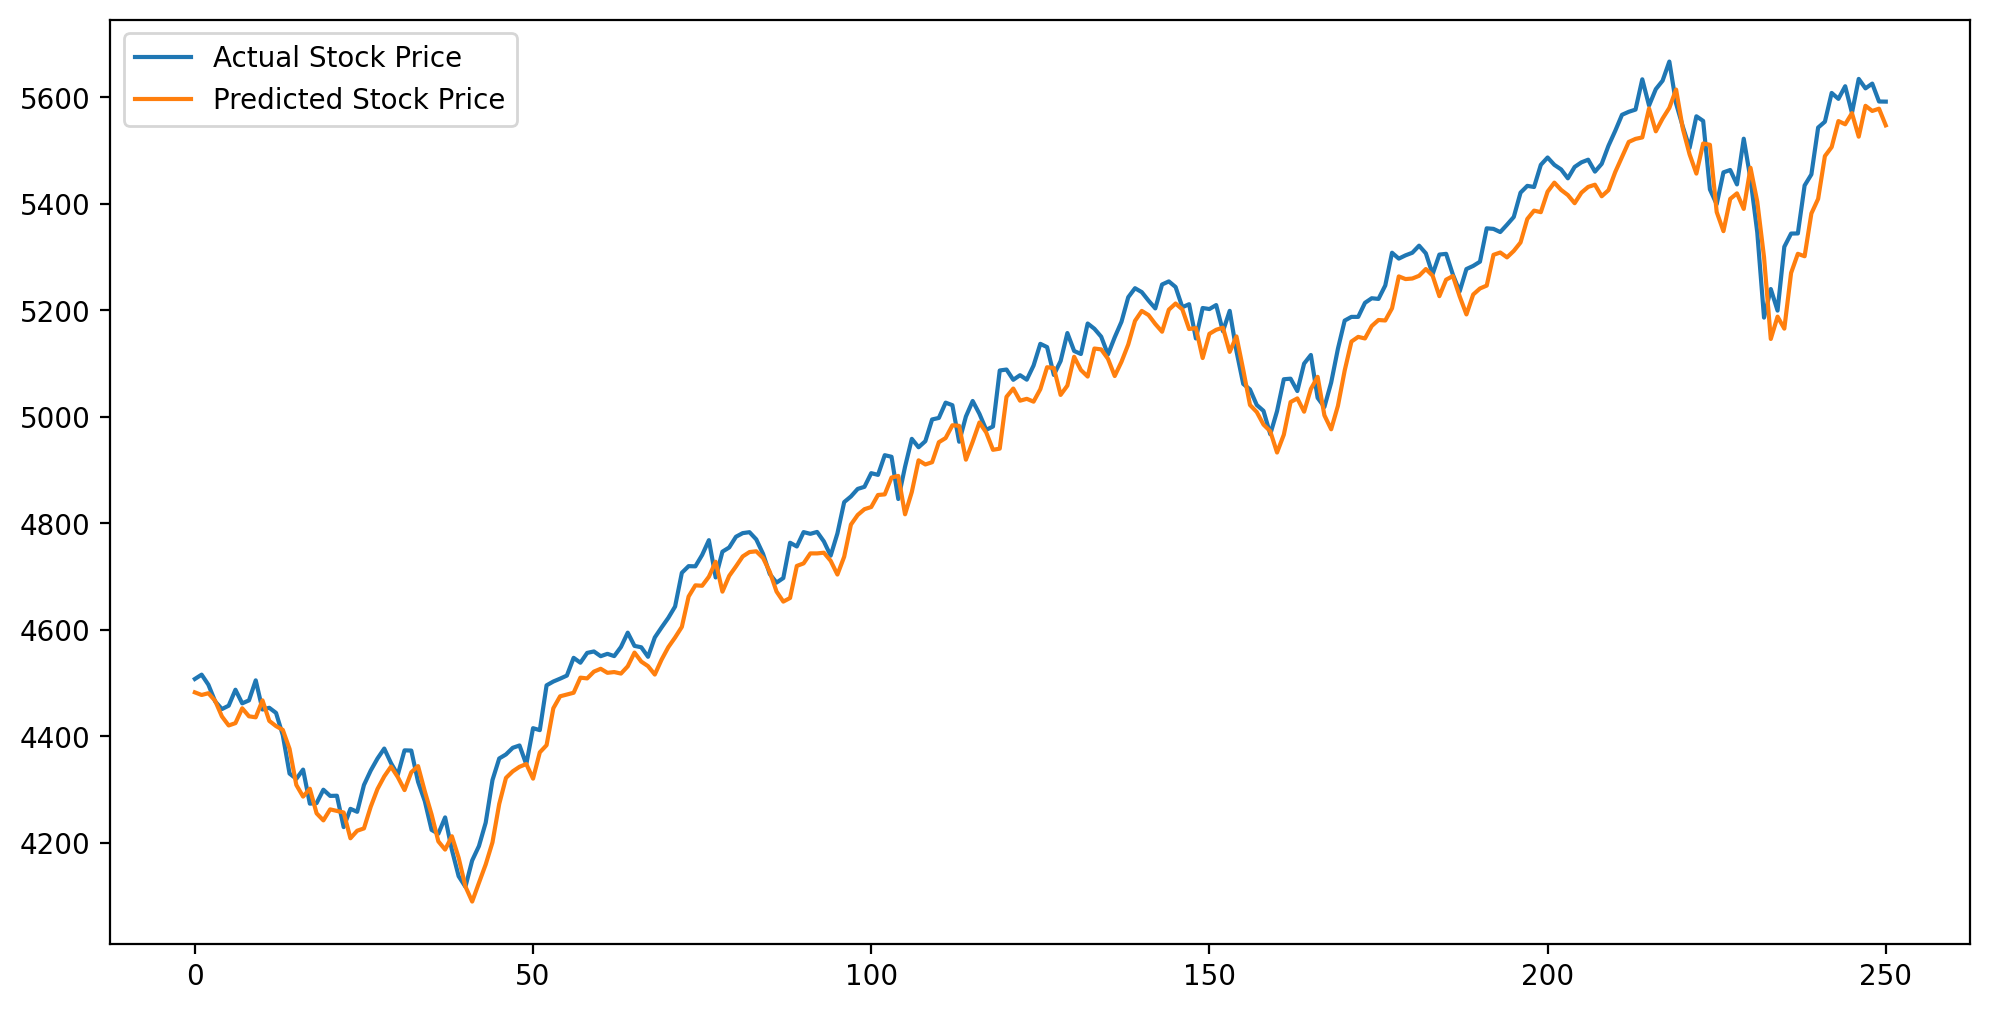

In [120]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Stock Price')
plt.plot(predictions, label='Predicted Stock Price')
plt.legend()
plt.show()